<a href="https://colab.research.google.com/github/shivampip/Journey2AI/blob/master/TimeSeriesPredictionWithLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Turorial Link](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data_path= tf.keras.utils.get_file("airline-passengets.csv","https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [92]:
data= pd.read_csv(data_path)
data= data.drop(['Month'], axis=1)
data.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


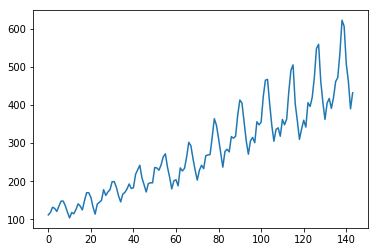

In [93]:
plt.plot(data)

#### LSTM with Regression

In [0]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(42)

In [0]:
data_arr= data.values
data_arr= data_arr.astype(np.float32)

In [96]:
data_arr.shape

(144, 1)

In [0]:
# Normalization
scaler= MinMaxScaler(feature_range=(0,1))
data_arr= scaler.fit_transform(data_arr)

In [98]:
data_arr.shape

(144, 1)

In [99]:
# Split into train and test
train_size= int(len(data_arr)*0.67)
test_size= len(data_arr) - train_size
X_train, X_test= data_arr[:train_size,:], data_arr[train_size:,:]
print(X_train.shape)
print(X_test.shape)

(96, 1)
(48, 1)


In [103]:
X_train[0:1,0]

array([0.01544401], dtype=float32)

In [0]:
#  Dataset creation
def create_dataset(dataset, look_back= 1):
    dataX, dataY= [], []
    for i in range(len(dataset)- look_back - 1):
        a= dataset[i: (i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[(i+ look_back):(i+look_back+1), 0])
    return np.array(dataX), np.array(dataY)

In [105]:
dataX, dataY= create_dataset(data.values)
print(dataX.shape)
print(dataY.shape)
print(dataX[:5])
print(dataY[:5])

(142, 1)
(142, 1)
[[112]
 [118]
 [132]
 [129]
 [121]]
[[118]
 [132]
 [129]
 [121]
 [135]]


In [0]:
look_back= 1
X_train, y_train= create_dataset(X_train, look_back)
X_test, y_test= create_dataset(X_test, look_back)

In [107]:
X_train.shape

(94, 1)

In [0]:
X_train= np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test= np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [109]:
X_train.shape

(94, 1, 1)

In [110]:
# LSTM model creation
model= keras.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, look_back)))
model.add(keras.layers.Dense(1))

model.compile(loss= 'mean_squared_error', optimizer= 'adam')

model.fit(X_train, y_train, epochs= 100, batch_size= 1, verbose= 2)

Epoch 1/100
94/94 - 1s - loss: 0.0456
Epoch 2/100
94/94 - 0s - loss: 0.0235
Epoch 3/100
94/94 - 0s - loss: 0.0176
Epoch 4/100
94/94 - 0s - loss: 0.0159
Epoch 5/100
94/94 - 0s - loss: 0.0153
Epoch 6/100
94/94 - 0s - loss: 0.0144
Epoch 7/100
94/94 - 0s - loss: 0.0136
Epoch 8/100
94/94 - 0s - loss: 0.0130
Epoch 9/100
94/94 - 0s - loss: 0.0121
Epoch 10/100
94/94 - 0s - loss: 0.0113
Epoch 11/100
94/94 - 0s - loss: 0.0102
Epoch 12/100
94/94 - 0s - loss: 0.0092
Epoch 13/100
94/94 - 0s - loss: 0.0080
Epoch 14/100
94/94 - 0s - loss: 0.0069
Epoch 15/100
94/94 - 0s - loss: 0.0057
Epoch 16/100
94/94 - 0s - loss: 0.0046
Epoch 17/100
94/94 - 0s - loss: 0.0038
Epoch 18/100
94/94 - 0s - loss: 0.0030
Epoch 19/100
94/94 - 0s - loss: 0.0026
Epoch 20/100
94/94 - 0s - loss: 0.0023
Epoch 21/100
94/94 - 0s - loss: 0.0023
Epoch 22/100
94/94 - 0s - loss: 0.0021
Epoch 23/100
94/94 - 0s - loss: 0.0021
Epoch 24/100
94/94 - 0s - loss: 0.0020
Epoch 25/100
94/94 - 0s - loss: 0.0021
Epoch 26/100
94/94 - 0s - loss: 0.

In [111]:
# Make Prediction
train_p= model.predict(X_train)
test_p= model.predict(X_test)

train_p= scaler.inverse_transform(train_p)
y_train= scaler.inverse_transform(y_train)
test_p= scaler.inverse_transform(test_p)
y_test= scaler.inverse_transform(y_test)

train_score= mean_squared_error(y_train[:,0], train_p[:,0])
test_score= mean_squared_error(y_test[:,0], test_p[:,0])
print("Train score :{:.2f}".format(train_score))
print("Test score :{:.2f}".format(test_score))


Train score :513.16
Test score :2467.49


In [116]:
train_p.shape

(94, 1)

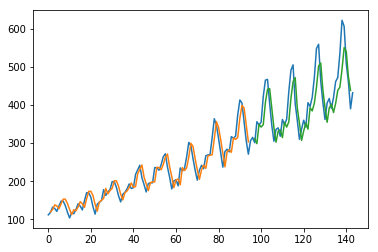

In [127]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_arr)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_p)+look_back, :] = train_p
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_arr)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_p)+(look_back*2)+1:len(data_arr)-1, :] = test_p
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_arr))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()